In [3]:
import pdb
import sys
import argparse
import itertools

import numpy as np

import matplotlib
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

sys.path.insert(0, '../../../figures')
import plot_utils as pu
import color_scheme as cs

Load data

In [7]:
datapath1 = "data/data_a.npy"
datapath2 = "data/data_b.npy"

In [8]:
z_sigma1, z_sigma2, distances1, distances2 = np.load(datapath1, allow_pickle=True)
data = np.load(datapath2, allow_pickle=True)

Plot

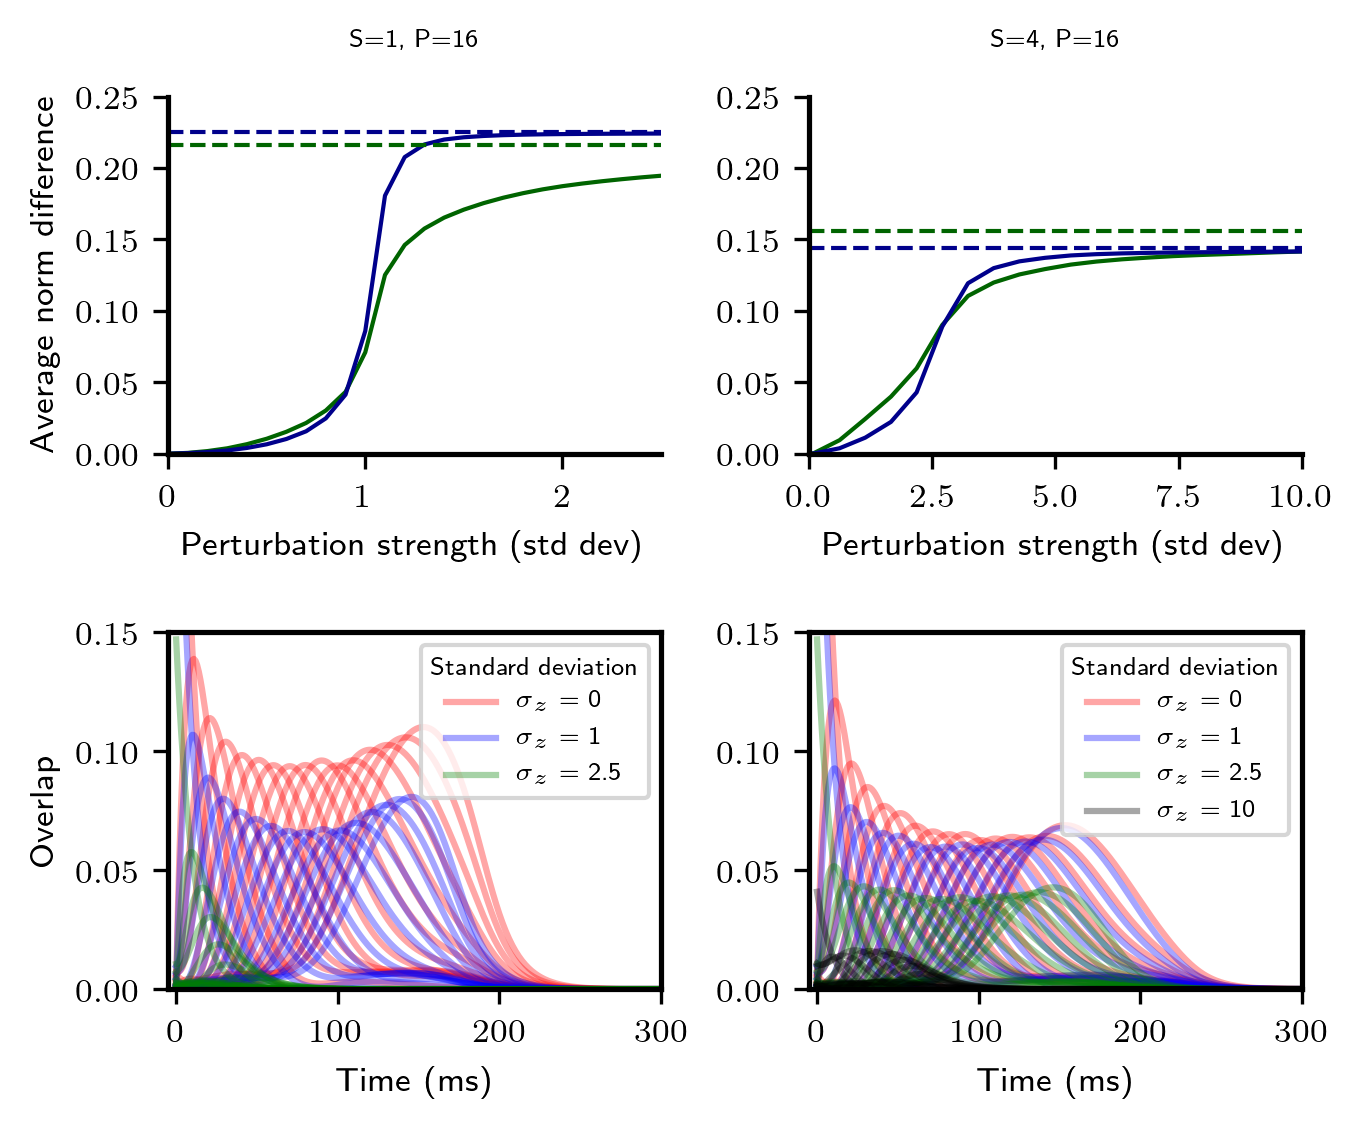

In [11]:
pu.figure_setup()
fig_size = pu.get_fig_size(12, 12)
fig = plt.figure(figsize=fig_size)

gs1 = gridspec.GridSpec(2, 2)
gs1.update(left=0.15, right=0.95, bottom=0.25, wspace=0.30, hspace=0.5)
ax1 = plt.subplot(gs1[0, 0])
ax2 = plt.subplot(gs1[0, 1])
ax3 = plt.subplot(gs1[1, 0])
ax4 = plt.subplot(gs1[1, 1])

# ------- Panel a ------------------------------------------------------------------

for ax, z_sigma, distances in zip([ax1, ax2], [z_sigma1, z_sigma2], [distances1, distances2]):
    ax.plot(np.r_[0, z_sigma], np.r_[0, distances[2]-distances[0]], linewidth=1, color='darkgreen')
    ax.plot(np.r_[0, z_sigma], np.r_[0, distances[3]-distances[1]], linewidth=1, color='darkblue')
    ax.axhline(y=distances[2], color='darkgreen', linestyle='dashed', linewidth=1)
    ax.axhline(y=distances[3], color='darkblue', linestyle='dashed', linewidth=1)

ax1.set_xlabel("Perturbation strength (std dev)")
ax2.set_xlabel("Perturbation strength (std dev)")
ax1.set_ylabel("Average norm difference")
ax1.set_xlim([0,2.5])
ax2.set_xlim([0,10])
ax1.set_ylim([0,0.25])
ax2.set_ylim([0,0.25])

# ------- Panel b ------------------------------------------------------------------

alpha = 0.35
for (sigma_z, S, P), M, overlaps in data:
    if S == 1:
        if sigma_z == 0:
            for m in overlaps:
                line1 = ax3.plot(m, color='red', alpha=alpha)[0]
        elif sigma_z == 1:
            for m in overlaps:
                line2 = ax3.plot(m, color='blue', alpha=alpha)[0]
        elif sigma_z == 2.5:
            for m in overlaps:
                line3 = ax3.plot(m, color='green', alpha=alpha)[0]
    elif S == 4:
        if sigma_z == 0:
            for m in overlaps:
                line1 = ax4.plot(m, color='red', alpha=alpha)[0]
        elif sigma_z == 1:
            for m in overlaps:
                line2 = ax4.plot(m, color='blue', alpha=alpha)[0]
        elif sigma_z == 2.5:
            for m in overlaps:
                line3 = ax4.plot(m, color='green', alpha=alpha)[0]
        elif sigma_z == 10:
            for m in overlaps:
                line4 = ax4.plot(m, color='black', alpha=alpha)[0]

ax3.legend(
    (line1, line2, line3),
    (r'$\sigma_{z}$ = 0',r'$\sigma_{z}$ = 1',r'$\sigma_{z}$ = 2.5'),
    title="Standard deviation")
ax4.legend(
    (line1, line2, line3,line4),
    (r'$\sigma_{z}$ = 0',r'$\sigma_{z}$ = 1',r'$\sigma_{z}$ = 2.5',r'$\sigma_{z}$ = 10'),
    title="Standard deviation")
ax3.set_ylabel("Overlap")
ax3.set_xlabel("Time (ms)")
ax4.set_xlabel("Time (ms)")

for ax in [ax1, ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

ax3.set_yticks([0,0.05,0.1,0.15])
ax4.set_yticks([0,0.05,0.1,0.15])

ax3.set_ylim([0,0.15])
ax3.set_xlim([-5,300])
ax4.set_ylim([0,0.15])
ax4.set_xlim([-5,300])

ax1.set_title("S=1, P=16", fontsize=6, pad=12)
ax2.set_title("S=4, P=16", fontsize=6, pad=12)

plt.subplots_adjust(bottom=0.25, left=0.2, wspace=0.2)
plt.savefig("../output/11.pdf", dpi=300, bbox_inches="tight")